In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [82]:
pd.set_option("display.max_rows",10)

In [8]:
dataset = load_boston()

In [15]:
# dataset

In [16]:
x,t = dataset.data,dataset.target
columns = dataset.feature_names

In [32]:
type(x),x.shape

(numpy.ndarray, (506, 13))

In [44]:
type(t),t.shape

(numpy.ndarray, (506,))

In [37]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [85]:
t[0]

24.0

In [51]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [59]:
df = pd.DataFrame(x,columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
df["Target"] = t   #ターゲットカラムを入れてあげる

In [65]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [80]:
t = df["Target"].values

In [81]:
x = df.drop(labels=["Target"],axis=1)

In [90]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,t_train,t_test = train_test_split(x, t, test_size=0.3, random_state=0)
#４つの値が返ってくるから変数を用意、train=学習用,test=テスト用　　　　　　　　　　　　　　　　　　  ↑テストデータを3割使う　                                             

In [99]:
len(x_train)  #上でテスト用を３割使う設定にしたから残りの７割が学習用に入ってくる

354

In [95]:
from sklearn.linear_model import LinearRegression

In [100]:
model = LinearRegression()

In [101]:
model

LinearRegression()

In [102]:
model.fit(x_train,t_train)

LinearRegression()

In [103]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

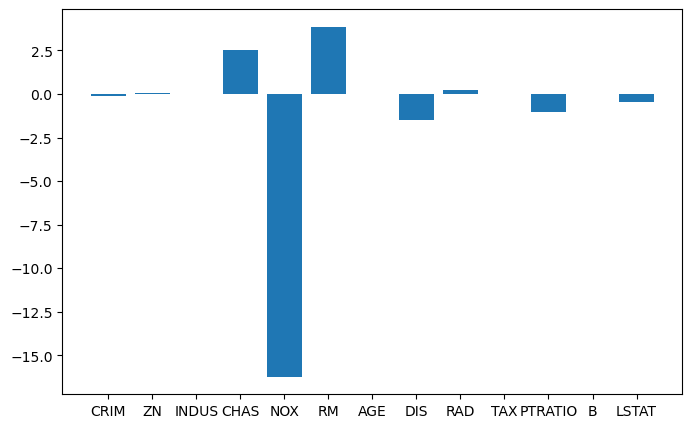

In [112]:
plt.figure(figsize=(8,5))
plt.bar(x=columns,height = model.coef_)

In [113]:
model.intercept_

37.937107741832875

In [114]:
print(f"train score: {model.score(x_train, t_train)}")
print(f"train score: {model.score(x_test, t_test)}")

train score: 0.7645451026942549
train score: 0.6733825506400191


In [117]:
y = model.predict(x_test)

In [118]:
x_test.shape

(152, 13)

In [121]:
print(f"予測値: {y[1]}")
print(f"目標値: {t_test[1]}")

予測値: 23.75163164074819
目標値: 50.0


In [122]:
#48:27